＃ビュッフェ形式を再現してみる

In [1]:
#defining the libraries and the environment variables
import os
from dotenv import load_dotenv
import openai
import pandas as pd
import numpy as np
import re
import random

load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")
openai.api_key = API_KEY

pd.set_option('display.max_colwidth', None)

In [2]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]


In [3]:
prompt="During a lunch break, you are in the college cafeteria where various meal options are available. Please choose your lunch.\n\
Think about how much you eat and take the right amount.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference.\n\
Answer only the menu you chose.\n\
"

In [39]:
choice_1 = "Dynamite chili and tangy lime-seasoned beets"
choice_2 = "Beets"
choice_3 = "Lighter-choice beets with no added sugar"
choice_4 = "High-antioxidant beets"

choice_list = [choice_1, choice_2, choice_3, choice_4]

In [8]:
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [3]:
import requests
from bs4 import BeautifulSoup

# URL of the page
url = "https://gakushoku.coop/search"

# Send HTTP request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Using the XPath provided as reference to create a similar BeautifulSoup search.
    # Let's break the XPath to guess the CSS selectors: '//*[@id="__next"]/section/div/div[3]/div[2]/div/section/ul/li[1]/div[2]/a/p[2]'
    # This can be roughly translated to CSS Selector: '#__next > section > div > div:nth-child(3) > div:nth-child(2) > div > section > ul > li:nth-child(1) > div:nth-child(2) > a > p:nth-child(2)'
    # You might need to adjust the selector based on actual page content.
    element = soup.select_one('#__next > section > div > div:nth-child(3) > div:nth-child(2) > div > section > ul > li:nth-child(1) > div:nth-child(2) > a > p:nth-child(2)')
    
    if element:
        # Print the text of the element
        print(element.text)
    else:
        print("Element not found.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Element not found.


In [49]:
import random

class Buffet_Stanford:
    def __init__(self):
        self.choice_1 = "Dynamite chili and tangy lime-seasoned beets"
        self.choice_2 = "Beets"
        self.choice_3 = "Lighter-choice beets with no added sugar"
        self.choice_4 = "High-antioxidant beets"
        self.choice_list = [self.choice_1, self.choice_2, self.choice_3, self.choice_4]

        self.class_1 = "Main dish"
        self.class_2 = "Side dish, Salad"
        self.class_3 = "Rice"
        self.class_4 = "Noodles"
        
        # Main dish
        self.food_1 = [
            "Blackended Tilapia",#ブラックエンドティラピア
            "Cajun Chick'n",#ケイジャンチキン
            "Homestyle Collard Greens",#ホームスタイルコリアンダー
            "Seasonal Steamed Vegetables",#季節の蒸し野菜
            "Dirty Rice",#ダーティライス
            "Cheesy Grits",#チーズグリッツ
            "Meat Lover's Pizza",#ミートラバーズピザ
            "Cheese Pizza",#チーズピザ
            "Allergy Friendly PizzaCrust",#アレルギーフレンドリーピザクラスト
            "Homestyle Chicken Soup",#ホームスタイルチキンスープ
            "Minestorone Soup",#ミネストローネスープ
            "Performance Bar",#パフォーマンスバー
            "Pasta Marinara",#パスタマリナーラ
        ]
        # Noodles


    def generate_buffet_prompt(self):
        random_choice = "Dynamite chili and tangy lime-seasoned beets"#random.choice(self.choice_list)
        self.food_1.append(random_choice)

        # Shuffle each food category list to randomize their order
        random.shuffle(self.food_1)

        buffet_prompt = f"{self.class_1}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_1)) + "\n" \

        return buffet_prompt, random_choice

# Instance creation and function call
buffet_st = Buffet_Stanford()
buffet_prompt, choice = buffet_st.generate_buffet_prompt()
print(buffet_prompt)
print("\nChosen Beet Dish:", choice)

Main dish
1. Pasta Marinara
2. Dirty Rice
3. Meat Lover's Pizza
4. Minestorone Soup
5. Allergy Friendly PizzaCrust
6. Performance Bar
7. Cajun Chick'n
8. Dynamite chili and tangy lime-seasoned beets
9. Homestyle Collard Greens
10. Cheesy Grits
11. Seasonal Steamed Vegetables
12. Homestyle Chicken Soup
13. Cheese Pizza
14. Blackended Tilapia


Chosen Beet Dish: Dynamite chili and tangy lime-seasoned beets


In [61]:
import random

class Buffet_UTokyo:
    def __init__(self):
        self.choice_1 = "Dynamite chili and tangy lime-seasoned beets"
        self.choice_2 = "Beets"
        self.choice_3 = "Lighter-choice beets with no added sugar"
        self.choice_4 = "High-antioxidant beets"
        self.choice_list = [self.choice_1, self.choice_2, self.choice_3, self.choice_4]

        self.class_1 = "Main dish"
        self.class_2 = "Side dish, Salad"
        self.class_3 = "Rice"
        self.class_4 = "Noodles"
        
        # Main dish
        self.food_1 = [
            "Deep-fried succulent chicken",#手仕込みジューシー唐揚げ
            "Hamburger steak with arrabbiata sauce",#スパイシートマトハンバーグ
        #    "Grilled chicken with salt-based sauce",#グリルチキン（塩だれ）
            "Salt-grilled mackerel"#さば塩焼き
        ]
        # Side dish, Salad
        self.food_2 = [
        #    "French fries Spicy",#フライドポテト（スパイシー）
        #    "Soft-boiled egg",#温泉たまご
        #    "Boiled spinach with dried bonito",#ほうれん草のおひたし
            "Boiled chopped okura",#オクラのおひたし
            "Soy sauce taste boiled dried daikon radish strips",#切り干し大根
        #    "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)",#ツナサラダ
        #    "Macaroni and corn salad (with wakame seaweed and shredded cabbage)"#マカロニ＆コーンサラダ
        ]
        # Rice
        self.food_3 = [
            "(Small size) Rice",#ごはん(小)
            "(Medium size) Rice",#ごはん(中)
            "(Large size) Rice"#ごはん(大)
        ]
        # Noodles
        self.food_4 = [
            "Plain udon noodles",#かけうどん
            "Zaru soba cool soba noodles",#ざるそば
            "Ramen in soy-sauce flavored soup"#醤油ラーメン
        ]

    def generate_buffet_prompt(self):
        random_choice = "Dynamite chili and tangy lime-seasoned beets"#random.choice(self.choice_list)
        self.food_2.append(random_choice)

        # Shuffle each food category list to randomize their order
        random.shuffle(self.food_1)
        random.shuffle(self.food_2)
        random.shuffle(self.food_3)
        random.shuffle(self.food_4)

        
        buffet_prompt = f"{self.class_1}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_1)) + "\n" \
                         f"{self.class_2}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_2)) + "\n" \
                         f"{self.class_3}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_3)) + "\n" \
                         f"{self.class_4}\n" + "\n".join(f"{idx+1}. {dish}" for idx, dish in enumerate(self.food_4))
        
        return buffet_prompt, random_choice

# Instance creation and function call
buffet_ut = Buffet_UTokyo()
buffet_prompt, choice = buffet_ut.generate_buffet_prompt()
print(buffet_prompt)
print("\nChosen Beet Dish:", choice)

Main dish
1. Salt-grilled mackerel
2. Deep-fried succulent chicken
3. Hamburger steak with arrabbiata sauce
Side dish, Salad
1. Boiled chopped okura
2. Soy sauce taste boiled dried daikon radish strips
3. Dynamite chili and tangy lime-seasoned beets
Rice
1. (Medium size) Rice
2. (Large size) Rice
3. (Small size) Rice
Noodles
1. Zaru soba cool soba noodles
2. Plain udon noodles
3. Ramen in soy-sauce flavored soup

Chosen Beet Dish: Dynamite chili and tangy lime-seasoned beets


In [53]:
def buffet_vegetable_preference(prompt,range_number):
    df = pd.DataFrame()
    
    for i in range(range_number):
        attribute = "college student"
        #attribute = random.choice(attribute_list)

        role = f"you are {attribute}."
        #you have to behave like {attribute}."

        buffet_prompt, selected_choice = buffet_ut.generate_buffet_prompt()

        response = generate_completion(role, buffet_prompt, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        vegetable_selected = choice_1.lower() in content or choice_1 in content
        df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_selected,"selected_vegetable":selected_choice},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df

In [62]:
df_1 = buffet_vegetable_preference(prompt,30)
#df_2 = buffet_vegetable_preference(choice_2,prompt,50)
df_1.head(30)

In [46]:
x = 1
y = 2
result = x or y
print(result)

result = x | y
print(result)

1
3


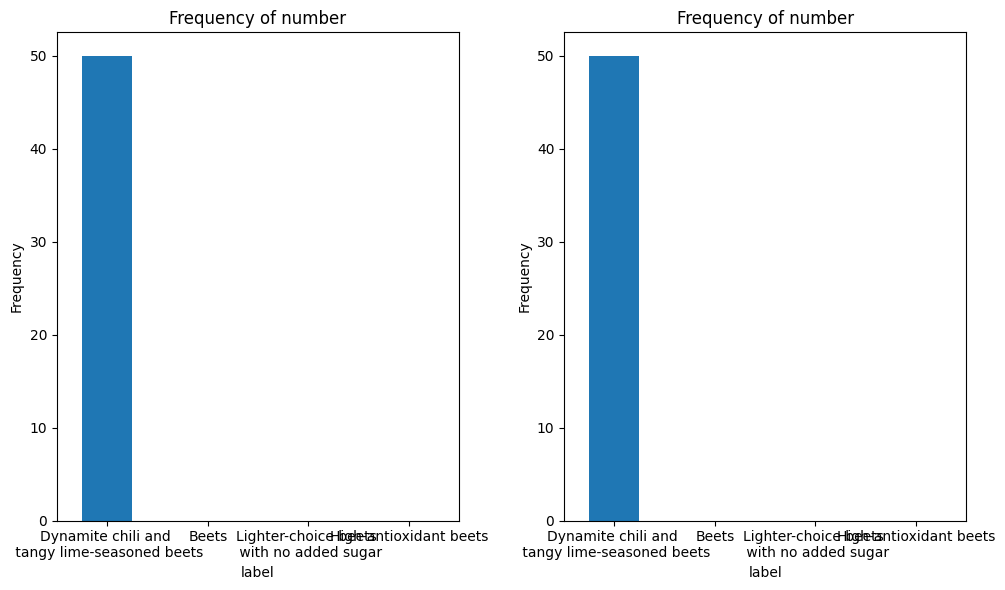

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dictionaries to map numeric values to descriptive labels
choice_1_dic = {
    1: "Dynamite chili and \n tangy lime-seasoned beets",
    2: "Beets",
    3: "Lighter-choice beets \n with no added sugar",
    4: "High-antioxidant beets"
}

choice_2_dic = {
    1:"Beets",
    2:"Dynamite chili and \n tangy lime-seasoned beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"High-antioxidant beets"
}


choice_3_dic = {
    1:"Higher-antioxidant beets",
    2:"Beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"Dynamite chili and \n tangy lime-seasoned beets"
}

column = "number"

# Define a function to plot frequency of numbers associated with descriptive labels
def plot_frequency(df,column,choice_dic, ax):
    frequency = df[column].value_counts().sort_index()
    frequency.index = frequency.index.map(lambda x: choice_dic[x])
    desired_order = list(choice_1_dic.values())
    frequency = frequency.reindex(desired_order)
    frequency.plot(kind='bar', ax=ax)
    ax.set_xlabel('label')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {column}')
    ax.tick_params(axis='x', rotation=0)

# Create DataFrame 1 (df_1) and DataFrame 2 (df_2) before calling this function

# Plot frequency for DataFrame 1
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
plot_frequency(df_1, column,choice_1_dic, ax1)

# Plot frequency for DataFrame 2
ax2 = plt.subplot(1, 3, 2)
plot_frequency(df_2, column,choice_2_dic, ax2)

#ax3 = plt.subplot(1, 3, 3)
#plot_frequency(df_3, column,choice_3_dic, ax3)

plt.tight_layout()
plt.show()
